# Customer Review Project

## Problem statement

**_Context_**

Alma is a french company that offers the easiest way for merchants to offer payment in multiple payments or deferred payments. Alma is an omnichannel solution and can therefore be used in your shop and/or for your e-commerce site.

In this project I will show you how to realiaze an analysis to determine what customers think about Alma and their service. 
I would like to highligh that the data we will get is in French.

**_Instructions_**

1. Scrap website of trustpilot to get all the data we will use
2. Clear the data if necessary and Export data to a GS that we will conect via our API (This data will be stocked there and everytime we run this script, we will update the GS 
3. Analysis
4. Conclusions


## Scrap Website of Trustpilot

In [53]:
#Import necessary libraries
import requests
import re
import numpy as np
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
url = 'https://fr.trustpilot.com/review/getalma.eu'
page = requests.get(url)
soup = BeautifulSoup(page.content)

In [3]:
nb_reviews_string = soup.find('span', class_="typography_typography__QgicV typography_bodysmall__irytL typography_color-gray-7__9Ut3K typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_text__W4hWi").text
nb_reviews = re.sub("[^0-9]","", nb_reviews_string)
print(f'The number of reviews for Alma is {nb_reviews}.')

The number of reviews for Alma is 2473.


In [54]:
#Create list with number of pages
l = []
for i in range(1, 120):
    l.append(i)
print(len(l))

119


In [5]:
#Get all review pages
urls = []
for i in l:
    url = 'https://fr.trustpilot.com/review/getalma.eu?page={}'.format(i)
    urls.append(url)
len(urls)

119

In [6]:
#Test 1 link
url_review_1 = urls[1]
page = requests.get(url_review_1)
print(page)
page_1 = BeautifulSoup(page.content)

<Response [200]>


In [ ]:
#Informations to scrap
#Name
#Number of Reviews
#Country
#Rating
#Full comment
#Date

In [8]:
#Build an empty dictionary to stock all the data
dic = {'name' : [], 'nb_reviews_page': [], 'country' : [], 'rating' :[], 'commentaire' : [], 'date' : []}

#Loop to get the data for each review for all pages (urls) of the trustpilot website
for url in tqdm(urls) : 

    page = requests.get(url)
    product = BeautifulSoup(page.content)

    #NAME
    name = product.find_all('div', class_='typography_typography__QgicV typography_bodysmall__irytL typography_weight-medium__UNMDK typography_fontstyle-normal__kHyN3 styles_consumerName__dP8Um')
    for i in name :
        dic['name'].append(i.text)

    #NB Reviews // Country 
    liste = []
    nb_reviews_page = product.find_all('div', {'class':'typography_typography__QgicV typography_bodysmall__irytL typography_color-gray-6__TogX2 typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_detailsIcon__Fo_ua'})
    for y in nb_reviews_page:
        liste.append(y.text)
    liste1 = liste[::2]
    liste2 = liste[1::2]
    for z in liste1 :
        dic['nb_reviews_page'].append(z)
    for r in liste2 :
        dic['country'].append(r)

    #Reviews
    reviews = product.find_all('section', {'class' : 'styles_reviewContentwrapper__zH_9M'})
    for e in reviews:
        try : 
            dic['commentaire'].append(e.find('p', {'data-service-review-text-typography':'true'}).text)
        except : 
            dic['commentaire'].append(np.nan)
            
    #Date + Rating
    for u in reviews:
        #dic['date'].append(u.find('time', {'data-service-review-date-time-ago' : 'true'})['datetime'])
        try :
            dic['date'].append(u.find('time', {'data-service-review-date-time-ago' : 'true'})['datetime'])
            dic['rating'].append(float(u.find('div', {'class' :'styles_reviewHeader__iU9Px' })['data-service-review-rating']))
        except :
            pass


100%|██████████| 119/119 [00:37<00:00,  3.20it/s]

{'name': ['J. S.', 'Godani', 'Solid Snoke', 'Odzic Jacqueline', 'Madame PALMERO', 'Aurore Richoux', 'Miguel Ferrere', 'Malod Corine', 'Le Gal', 'M-Th MARIE-CARDINEClient n°0334076', 'sylvain', 'GAUTIER', 'Benjamin Petit', 'CLEUET Jean-Jacques', 'Nadia Yagoubiu', 'Alienor Barraud de Lagerie', 'Catherine', 'Mr Jean pierre Orsini', 'Client Hermes 14', 'Pascal carchi', 'Sonia B', 'Giovanni Catania', 'Yves MOQUET TORCY', 'Cyril Destandeau', 'Gilles', 'BL', 'Sofian Billi', 'Valerie TOURET', 'Frederic Pinat', 'GEGE', 'LETELLIER PASCAL', 'Pascal Bonnel', 'client(e)', 'patricia della rocca', 'Isabelle COUTURIER', 'Joffrey Laignel', 'Sandrinette', 'antoine', 'JEAN CLAUDE', 'isabelle greneau', 'audrey gouleret', 'Christophe LEBRU', 'Mme JOLY CHRISTINE', 'Leclerc Sonia', 'Clotilde K.', 'Sebastian Kaldenberg', 'Micheline Arestino', 'yaprak tan', 'Olga BARRERA', 'PAYEN Sandrine', 'Bernard Pinheiro de Azevedo', 'Julien B', 'OLIVIER', 'M. yan jeudy', 'ERIC H', 'Corina', 'Lydia', 'NATHALIE TOUATY', 'Mi

In [43]:
#Verify lengih before printing
print(len(dic['name']))
print(len(dic['nb_reviews_page']))
print(len(dic['country']))
print(len(dic['rating']))
print(len(dic['commentaire']))
print(len(dic['date']))

2380
2380
2380
2380
2380
2380


In [12]:
import pandas as pd

In [49]:
#Clear Dataframe before saving it
df = pd.DataFrame(dic)
df['nb_reviews_page'] = df['nb_reviews_page'].str.replace(" avis","")
df

,name,nb_reviews_page,country,rating,commentaire,date
0,J. S.,4,FR,5.0,Solution simple et pratique pour acheter de la...,2022-04-09T21:08:10.000Z
1,Godani,5,FR,5.0,Première utilisation et pas de problème. Parfait,2022-04-09T16:32:53.000Z
2,Solid Snoke,2,FR,1.0,"Suite à une annulation de commande, le vendeur...",2022-04-09T07:11:29.000Z
3,Odzic Jacqueline,1,FR,5.0,1ère fois en utilisant ce moyen en 4 fois Je s...,2022-04-09T06:59:03.000Z
4,Madame PALMERO,5,FR,5.0,Génial cela permet de s’offrir de la qualité s...,2022-04-09T06:30:32.000Z
...,...,...,...,...,...,...
2375,Nicolas,1,FR,5.0,Simple et efficace. J'ai passé commande via le...,2020-11-18T14:52:27.000Z
2376,Marina,1,FR,5.0,Je suis vraiment contente d'être passée par Al...,2020-11-16T14:28:29.000Z
2377,Marie,2,FR,5.0,J'utilise Alma pour payer toutes mes commandes...,2020-11-13T19:11:46.000Z
2378,François,3,FR,5.0,J'ai commandé mes produits sur O'BarberShop av...,2020-11-03T11:03:51.000Z


In [50]:
#Count number of nan by column
pd.DataFrame(dic).isna().sum()

name                 0
nb_reviews_page      0
country              0
rating               0
commentaire        618
date                 0
dtype: int64

In [17]:
#Save doc on my folder
df.to_csv('data_Alma_para_Alice.csv', encoding='utf-8', index=False)

In [51]:
print(len(df.values))

2380


## Export to GS

In [19]:
!pip install gspread==5.3.0

In [20]:
import gspread

In [21]:
#Insert the path to your json account here
path = 'level-chassis-345709-4deccf52db36.json'
gc = gspread.service_account(filename=path)


In [22]:
#Insert the id of your spreadsheet where you wanna stock the data
file = gc.open_by_key('1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg').sheet1
worksheet = file
worksheet

<Worksheet 'Feuille 1' id:0>

In [23]:
#This function is to clear the document every time we execute this script. Remove it if you wanna stock your data
worksheet.clear()

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'clearedRange': "'Feuille 1'!A1:Z16000"}

In [24]:
worksheet.append_row(list(df.columns))

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'updates': {'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
  'updatedRange': "'Feuille 1'!A1:F1",
  'updatedRows': 1,
  'updatedColumns': 6,
  'updatedCells': 6}}

In [25]:
#Its necessary to fill df with '' because does not accept nans
df = df.fillna('')
df

,name,nb_reviews_page,country,rating,commentaire,date
0,J. S.,4 avis,FR,5.0,Solution simple et pratique pour acheter de la...,2022-04-09T21:08:10.000Z
1,Godani,5 avis,FR,5.0,Première utilisation et pas de problème. Parfait,2022-04-09T16:32:53.000Z
2,Solid Snoke,2 avis,FR,1.0,"Suite à une annulation de commande, le vendeur...",2022-04-09T07:11:29.000Z
3,Odzic Jacqueline,1 avis,FR,5.0,1ère fois en utilisant ce moyen en 4 fois Je s...,2022-04-09T06:59:03.000Z
4,Madame PALMERO,5 avis,FR,5.0,Génial cela permet de s’offrir de la qualité s...,2022-04-09T06:30:32.000Z
...,...,...,...,...,...,...
2375,Nicolas,1 avis,FR,5.0,Simple et efficace. J'ai passé commande via le...,2020-11-18T14:52:27.000Z
2376,Marina,1 avis,FR,5.0,Je suis vraiment contente d'être passée par Al...,2020-11-16T14:28:29.000Z
2377,Marie,2 avis,FR,5.0,J'utilise Alma pour payer toutes mes commandes...,2020-11-13T19:11:46.000Z
2378,François,3 avis,FR,5.0,J'ai commandé mes produits sur O'BarberShop av...,2020-11-03T11:03:51.000Z


In [26]:
worksheet.update('A2', df.values.tolist())

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'updatedRange': "'Feuille 1'!A2:F2381",
 'updatedRows': 2380,
 'updatedColumns': 6,
 'updatedCells': 14280}

In [27]:
#Check your spreadsheets
#url = https://docs.google.com/spreadsheets/d/1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg/edit?usp=sharing

## Analysis

In [32]:
from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('french')

In [33]:
#There still a lot of stop words, so we will add them to our dictionary and clear again the df
extra_words = ['a', 'cest', 'je', 'bonjouroui', 'leurs', 'foidtrès']

In [34]:
final_stopwords = final_stopwords_list + extra_words

In [35]:
#We create a copy to do not modify main dataframe
df_test = df.copy()

In [36]:
df_test['commentaire sans stop words'] = df_test['commentaire'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
print(df_test)

                  name nb_reviews_page country  rating  \
0                J. S.          4 avis      FR     5.0   
1               Godani          5 avis      FR     5.0   
2          Solid Snoke          2 avis      FR     1.0   
3     Odzic Jacqueline          1 avis      FR     5.0   
4       Madame PALMERO          5 avis      FR     5.0   
...                ...             ...     ...     ...   
2375           Nicolas          1 avis      FR     5.0   
2376            Marina          1 avis      FR     5.0   
2377             Marie          2 avis      FR     5.0   
2378          François          3 avis      FR     5.0   
2379          Benjamin          4 avis      FR     5.0   

                                            commentaire  \
0     Solution simple et pratique pour acheter de la...   
1      Première utilisation et pas de problème. Parfait   
2     Suite à une annulation de commande, le vendeur...   
3     1ère fois en utilisant ce moyen en 4 fois Je s...   
4     Gé

In [37]:
df_clean = pd.DataFrame(df_test)

In [38]:
df_clean['commentaire sans stop words'][0]

'Solution simple pratique acheter qualité.'

In [44]:
#Since we want to get the Word Frequency it is better to convert the text to a lower case and to remove the punctuations.
df_clean['mytext_new'] = df_clean['commentaire sans stop words'].str.lower().str.replace('[^\w\s]','')

new_df = df_clean.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.head(15)

C:\Users\SAIDEL~1\AppData\Local\Temp/ipykernel_30340/1345038256.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['mytext_new'] = df_clean['commentaire sans stop words'].str.lower().str.replace('[^\w\s]','')


,Word,Frequency
0,très,664
1,bien,379
2,paiement,376
3,fois,333
4,rapide,225
5,je,214
6,merci,212
7,sans,195
8,service,195
9,cest,194


In [40]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from os import path
from wordcloud import WordCloud

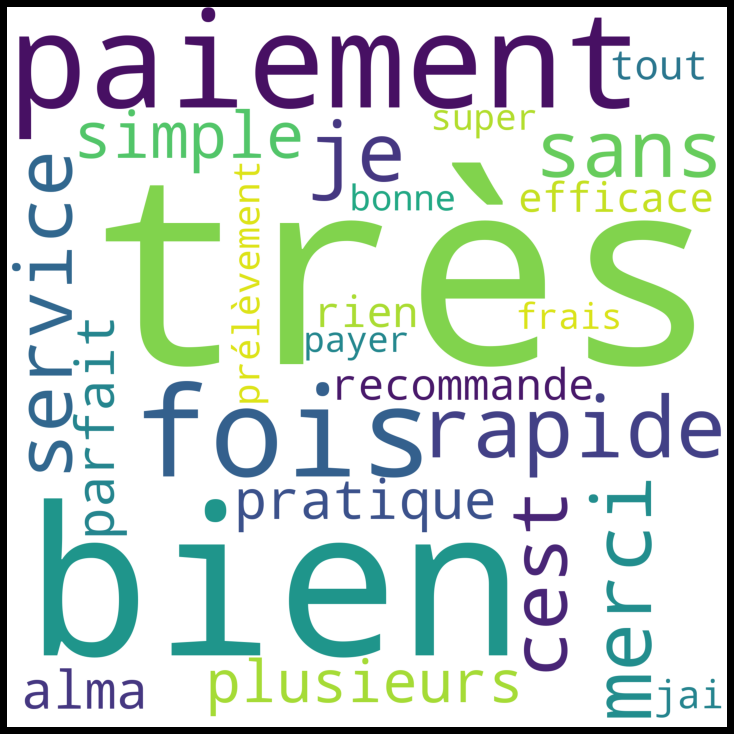

In [46]:
word_freq = dict(zip(new_df.Word, new_df.Frequency))

wc = WordCloud(background_color="white",width=2000,height=2000, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)

#plt.imshow(wc)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()